# Obesity Levels 

### Our Motivation 
The "Obesity Levels" dataset has captured our interest because obesity is a major public health issue with significant consequences. By examining this dataset, we hope to uncover the key factors contributing to obesity and leverage machine learning models to enhance our ability to classify and predict obesity levels. Understanding these factors will empower individuals and healthcare professionals to create more effective prevention strategies, ultimately reducing obesity rates and improving public health outcomes. 

### Our Goal 
Our goal is to create a machine-learning model that predicts individual obesity levels using both classification and clustering techniques. The classification approach will enable us to train the model to differentiate between individuals with different obesity levels based on a variety of health, dietary, and lifestyle factors. Clustering, on the other hand, will help identify hidden patterns in the dataset by grouping individuals with similar obesity risk profiles. These clusters will then assist in predicting obesity levels for new individuals by analyzing their resemblance to existing groups.

In [7]:
import pandas as pd
df = pd.read_csv('Dataset/Orignal_dataset.csv')
filtered_df =pd.read_csv('Dataset/Orignal_dataset.csv')

##### source of dataset : https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

#### General Information About The Dataset
- Dataset include 17 attributes and 2111 records.
- There is 8 attributes of type float and the other 9 of type object. 
- Class label : NObeyesdad ( type of obesity ).
- There are no missing values.

#### Clarifying Attributes' Shortcuts
- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
-  CAEC : Feature, Categorical, " Do you eat any food between meals? "
-  CH2O: Feature, Continuous, " How much water do you drink daily? "
-  SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
-  FAF: Feature, Continuous, " How often do you have physical activity? "
-  TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
-  CALC : Feature, Categorical, " How often do you drink alcohol? "
-  MTRANS : Feature, Categorical, " Which transportation do you usually use? "
-  NObeyesdad : Target, Categorical, "Obesity level"


## Data Summarization


In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

### Sample data 

 Here we selected a random sample of 100 rows from the obesity dataset to gain insights into the data .


In [10]:
sample_df = df.sample(n=100, random_state=42) 
sample_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
544,20.406871,Female,1.755978,53.699561,no,yes,2.000000,3.891994,no,no,1.863930,yes,2.870127,2.000000,Frequently,Public_Transportation,Insufficient_Weight
1987,26.000000,Female,1.624950,111.004920,Sometimes,yes,3.000000,3.000000,no,no,2.704315,yes,0.000000,0.322666,Sometimes,Public_Transportation,Obesity_Type_III
420,18.000000,Male,1.850000,60.000000,Sometimes,yes,3.000000,4.000000,yes,no,2.000000,yes,2.000000,0.000000,Sometimes,Automobile,Insufficient_Weight
527,21.000000,Female,1.520000,42.000000,Sometimes,yes,3.000000,1.000000,no,no,1.000000,no,0.000000,0.000000,Frequently,Public_Transportation,Insufficient_Weight
196,22.000000,Male,1.750000,74.000000,Sometimes,no,2.000000,3.000000,no,no,2.000000,yes,1.000000,2.000000,Sometimes,Bike,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,17.908114,Male,1.793926,59.682591,no,yes,2.568063,4.000000,no,no,2.000000,yes,2.000000,0.220029,Sometimes,Automobile,Insufficient_Weight
299,23.000000,Male,1.700000,75.000000,Sometimes,yes,3.000000,3.000000,no,no,3.000000,no,1.000000,2.000000,Sometimes,Public_Transportation,Overweight_Level_I
109,21.000000,Female,1.650000,88.000000,no,yes,3.000000,1.000000,no,no,3.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_I
298,18.000000,Male,1.800000,80.000000,Frequently,yes,2.000000,3.000000,no,no,1.000000,yes,0.000000,1.000000,Frequently,Public_Transportation,Normal_Weight


### Histogram

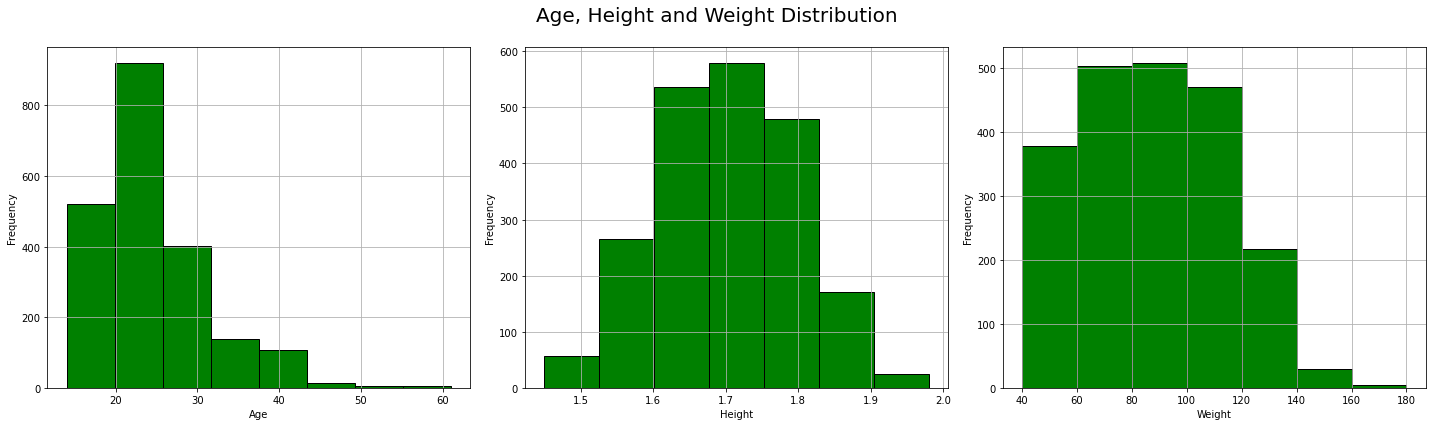

In [11]:
#subplot includes histograms of Age, Height and Weight
plt.figure(figsize=(20,6))
plt.suptitle('Age, Height and Weight Distribution', fontsize=20)

#first chart
plt.subplot(1,3,1)
df["Age"].hist(color='green' ,bins=8 ,edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")

#second chart
plt.subplot(1,3,2)
df["Height"].hist(color='green' ,bins=7,edgecolor='black')
plt.xlabel("Height")
plt.ylabel("Frequency")

#third chart
plt.subplot(1,3,3)
Weight_bins=[40, 60,80,100,120,140,160,180]
df["Weight"].hist(color='green' , bins=Weight_bins,edgecolor='black')
plt.xticks(Weight_bins)
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

#### Summery of Graphs
Histograms are a powerful tool for visualizing the distribution of continuous numerical data. With the most important continuous variables in our dataset, Age, Height, and Weight.

##### 1. Age Histogram (Leftmost Plot):
- <b>Shape:</b>  The distribution is right-skewed (positively skewed).
- <b>Peak:</b> The highest frequency of individuals falls within the 20 to 25 age range.
- <b>Spread:</b> This shows that the population is largely concentrated among younger individuals, especially in their 20s and 30s.

##### 2. Height Histogram (Middle Plot):
- <b>Shape:</b> The distribution appears close to normal (bell-shaped).
- <b>Peak:</b> The most frequent height is around 1.7 meters.
- <b>Spread:</b> The heights generally range between 1.60 meters and 1.82 meters, with less individuals below or above this range.
- <b>Observation:</b> The height distribution is centered around an average height, with a symmetrical spread on both sides, indicating a typical height distribution for a population.

##### 3. Weight Histogram (Rightmost Plot):
- <b>Shape:</b> The weight distribution is slightly skewed to the right.
- <b>Peak:</b> The most frequent weights are between 60 and 120 kg.
- <b>Spread:</b> The majority of individuals weigh between 40 and 140 kg, with a significant drop in frequency for weights above 140 kg.

### Heat Map 

Text(0.5, 1.0, 'Correlation heatmap')

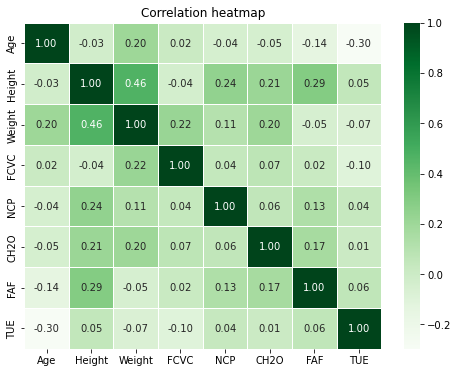

In [12]:
selected_columns = df [['Age' , 'Height' , 'Weight' , 'FCVC' , 'NCP' , 'CH2O' , 'FAF' , 'TUE']]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True , cmap='Greens',fmt=".2f",linewidths=.5)
plt.title('Correlation heatmap')

The heatmap provides a quick visual summary of relationships, helping us identify highly correlated variables, either positively or negatively .
#### Correlation meanings :
- if the number is close to 1 , that means it has a Positive Strong Correlation
- if the number is between 0.3 and 0.7 , that means it has Moderate Correlation
- if the number is close to zero , that means it has Weak or No Correlation
- if the number is close to -1 , that means it has a Negative Strong Correlation

Most of our attributes has no correlation since they are mostly close to zero , and few has a Moderate Correlation such as ( weight and height ) there is a noticeable but not exceptionally strong linear relationship between a person's height and their weight .

### chi-square

In [13]:
from scipy.stats import chi2_contingency


# Define the columns to compare
col1 = 'family_history_with_overweight'
col2 = 'CAEC'

# Create a contingency table for the two columns
contingency_table = pd.crosstab(df[col1], df[col2])

print(f"\nContingency Table for {col1} and {col2}:")
print(contingency_table)

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"\nChi-Square Statistic for {col1} and {col2}: {chi2_stat}")
print(f"P-Value for {col1} and {col2}: {p_value}")
print(f"Degrees of Freedom for {col1} and {col2}: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the result
if p_value < 0.05:
    conclusion = "There is a significant association between family history of overweight and CAEC."
else:
    conclusion = "There is no significant association between family history of overweight and CAEC."

print(f"\nConclusion: {conclusion}")



Contingency Table for family_history_with_overweight and CAEC:
CAEC                            Always  Frequently  Sometimes  no
family_history_with_overweight                                   
no                                  19         114        219  33
yes                                 34         128       1546  18

Chi-Square Statistic for family_history_with_overweight and CAEC: 260.36443035979585
P-Value for family_history_with_overweight and CAEC: 3.7494858053242665e-56
Degrees of Freedom for family_history_with_overweight and CAEC: 3
Expected Frequencies:
[[   9.66603505   44.13548081  321.89720512    9.30127901]
 [  43.33396495  197.86451919 1443.10279488   41.69872099]]

Conclusion: There is a significant association between family history of overweight and CAEC.


we applied chi-square for some of our nominal attributes to check the correlation between them and visualize them since heat map only accept numeric values , so we chose Family history with overweight and CAEC ( Do you eat any food between meals ? )

### Missing Values

In [14]:
missing_values=df.isna().sum()
print('\033[1mMissing Values in each column:\033[0m')  
print(missing_values,'\n')
print('\033[1mTotal Number of Missing Values in Dataset:\033[0m')
print(missing_values.sum())
   

Missing Values in each column:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64 

Total Number of Missing Values in Dataset:
0


### Bar Chart

<function matplotlib.pyplot.show(close=None, block=None)>

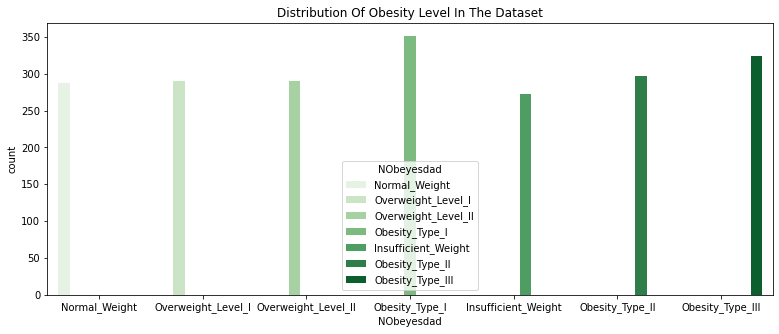

In [15]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

We choose a bar chart because it is ideal for displaying this type of information because it visually represents the categorical distribution of data, allowing us to easily compare the frequency of each obesity level. It clearly shows differences in count across categories, making it simple to identify patterns, such as which obesity levels are most or least common, as well as categories with similar representation. The bar chart's straightforward layout makes it an effective tool for presenting discrete, non-continuous data like obesity levels, where each category is distinct and counts are important for analysis.

The dataset shows a diverse distribution across obesity categories, with the largest group in the (Obesity_Type_I) category.A substantial number of individuals also fall under Normal_Weight, Overweight_Level_I, and Overweight Level_II.

(Insufficient_Weight )is the least represented category, indicating fewer individuals fall under this category. This information can help in understanding the weight distribution and in further analysis related to health outcomes or associated risk factors.

### Box Plot 

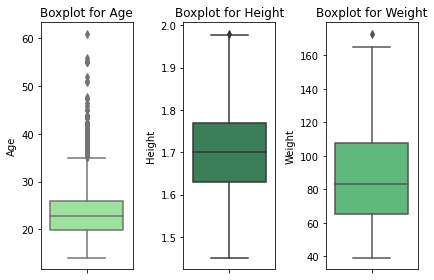

In [16]:
fig, axes = plt.subplots(1,3,)
sns.boxplot(data=df,y='Age' , ax=axes[0],color='#90EE90')
axes[0].set_title("Boxplot for Age")
sns.boxplot(data=df,y='Height' , ax=axes[1],color='#2E8B57')
axes[1].set_title("Boxplot for Height")
sns.boxplot(data=df,y='Weight' , ax=axes[2],color='#50C878')
axes[2].set_title("Boxplot for Weight")
plt.tight_layout()
plt.show();


The figure contains three boxplots side by side, each representing different variables:

1. **Boxplot for Age**:
   - This plot depicts the distribution of "Age."
   - The median age appears to be around **22 years**.
   - There are several outliers above **35**, indicated by the dots above the upper whisker.
   - The interquartile range (IQR) stretches roughly from **22 to 30**.

2. **Boxplot for Height**:
   - This plot represents the "Height" variable.
   - The median height seems to be about **1.7 meters**.
   - There are a few outliers around **2.0 meters**.
   - The IQR lies between approximately **1.6 and 1.8 meters**.

3. **Boxplot for Weight**:
   - This plot shows the distribution of "Weight."
   - The median weight looks close to **80 kg**.
   - One outlier exists at around **170 kg**.
   - The IQR ranges between **60 and 100 kg**.

These boxplots provide a summary of the data distribution for age, height, and weight, illustrating central tendency (median), spread (IQR), and outliers that we could consider removing later.


### Pie Chart

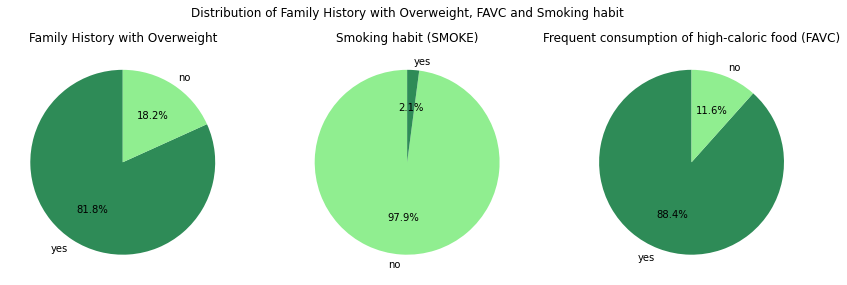

In [17]:
plt.figure(figsize=(12, 4))
plt.suptitle('Distribution of Family History with Overweight, FAVC and Smoking habit')

plt.subplot(1,3,1)
family_history_values = df['family_history_with_overweight'].value_counts()
plt.pie(family_history_values, labels=family_history_values.index, autopct='%1.1f%%', startangle=90, colors=['#2E8B57','#90EE90'])
plt.title('Family History with Overweight')

plt.subplot(1,3,2)
smoke_values = df['SMOKE'].value_counts()
plt.pie(smoke_values, labels=smoke_values.index, autopct='%1.1f%%', startangle=90, colors=['#90EE90','#2E8B57'])
plt.title('Smoking habit (SMOKE)')

plt.subplot(1,3,3)
favc_values = df['FAVC'].value_counts()
plt.pie(favc_values, labels=favc_values.index, autopct='%1.1f%%', startangle=90, colors=['#2E8B57','#90EE90'])
plt.title('Frequent consumption of high-caloric food (FAVC)')

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

#### FAVC (Frequent Consumption of High-Caloric Food)
This pie chart displays the percentage of individuals who frequently consume high-caloric foo . Based on the chart, 88.4% of respondents answered “yes,” highlighting a notable presence of unhealthy eating habits, which is a significant factor in obesity. Meanwhile, the remaining 11.6% who answered “no” demonstrate healthier dietary habits among this group of individuals.

#### SMOKE (Smoking habit)
This pie chart displays the percentage of individuals who smoke or not. 97.9% of the responses were ‘no,’ while only 2.1% answered ‘yes.’ This indicates that most individuals in the dataset don’t smoke, which suggests they face fewer health risks related to smoking, such as obesity. Since the majority of people here don’t smoke, it likely means that smoking isn’t a major contributing factor to obesity in this group.

#### Family History With Overweight
This pie chart displays percentage of individuals with family history with overweight. 81.8% of individuals answered ‘yes,’ indicating that genetic or familial factors, such as family history, are associated with an increased risk of being overweight or obese due to both genetic and shared lifestyle factors.

### Describe Function 


In [18]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Here we have summary statistics for our numerical columns such as Height, Weight, and others. While we have previously visualized some of these measures using box plots (for central tendencies and spread) and histograms (for distributions), the describe() function gathers these key statistics in a more precise, tabular form.

## Data Preprocessing

### Balancing our dataset 

In [19]:
# maps obesity levels (class label )in the dataset from 7 classes to 4 for easier analysis.
label_mapping = {
    'Insufficient_Weight': 'Insufficient_Weight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obesity',
    'Obesity_Type_II': 'Obesity',
    'Obesity_Type_III': 'Obesity'
}

df['NObeyesdad'] = df['NObeyesdad'].map(label_mapping)

#### Bar chart after Mapping 

<function matplotlib.pyplot.show(close=None, block=None)>

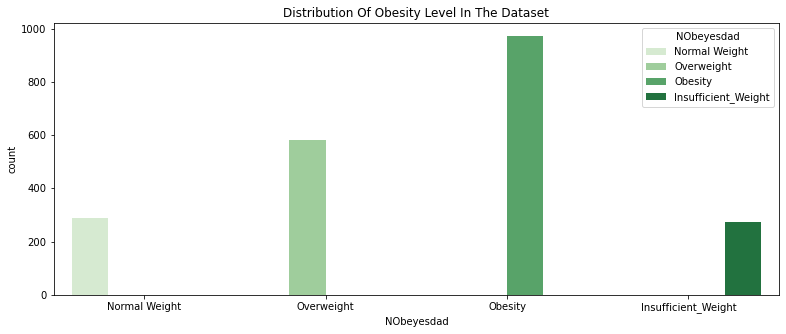

In [20]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

In [21]:
from sklearn.utils import resample
print("Original distribution:")
print(df['NObeyesdad'].value_counts())
class_proportions = df['NObeyesdad'].value_counts(normalize=True)
print(class_proportions)

downsample_ratio = 0.55 # 50% of the original size for Obesity and Overweight

# Create a DataFrame to store the balanced data
balanced_df = pd.DataFrame()

# Apply undersampling for Obesity and Overweight and keep Insufficient_Weight and Normal Weight unchanged 
for label in df['NObeyesdad'].unique():
    df_label = df[df['NObeyesdad'] == label]
    
    if label in ['Obesity', 'Overweight']:
        # Downsample Obesity and Overweight to 50% of their original size
        target_samples = int(len(df_label) * downsample_ratio)
        df_label_resampled = resample(df_label, replace=False, n_samples=target_samples, random_state=30)
    else:
        # keep Insufficient_Weight and Normal Weight unchanged 
        df_label_resampled = df_label
    
    # Append the resampled or unchanged data to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, df_label_resampled])

   # Shuffle the resulting balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print("\nBalanced distribution:")
print(balanced_df['NObeyesdad'].value_counts())

class_proportions = balanced_df['NObeyesdad'].value_counts(normalize=True)
print(class_proportions)

Original distribution:
Obesity                972
Overweight             580
Normal Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64
Obesity                0.460445
Overweight             0.274751
Normal Weight          0.135955
Insufficient_Weight    0.128849
Name: NObeyesdad, dtype: float64

Balanced distribution:
Obesity                534
Overweight             319
Normal Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64
Obesity                0.378187
Overweight             0.225921
Normal Weight          0.203258
Insufficient_Weight    0.192635
Name: NObeyesdad, dtype: float64


#### Evaluating and Achieving Dataset Balance

We define a dataset as Balanced when the ratio between the largest and smallest class proportions is close to 2:1. Conversely, a dataset is considered Imbalanced if this ratio exceeds 2:1 significantly.

In our original dataset, the class proportions were as follows:

Largest class proportion: 0.460445
Smallest class proportion: 0.128849
Calculating the ratio:

Ratio = 0.460445 / 0.128849 ≈ 3.58

Since this ratio is greater than 2, we determined that our dataset was imbalanced.

After applying techniques to balance the dataset, the updated class proportions are:

Largest class proportion: 0.378187
Smallest class proportion: 0.192635
Calculating the new ratio:

New Ratio = 0.378187 / 0.192635 ≈ 1.96

With this new ratio being less than 2, we have successfully balanced our dataset.

#### Bar chart after balancing our dataset  

<function matplotlib.pyplot.show(close=None, block=None)>

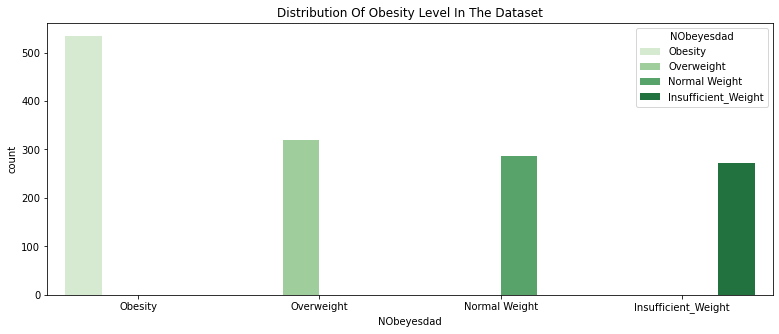

In [22]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = balanced_df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

### Removing outliers

In [23]:
AgeQ1 = df['Age'].quantile(0.25)
AgeQ3 = df['Age'].quantile(0.75)

AIQR = AgeQ3 - AgeQ1

Alower_bound = AgeQ1 - 1.5 * AIQR
Aupper_bound = AgeQ3 + 1.5 * AIQR # For Age 

WQ1 = df['Weight'].quantile(0.25)
WQ3 = df['Weight'].quantile(0.75)

WIQR = WQ3 - WQ1

Wlower_bound = WQ1 - 1.5 * WIQR
Wupper_bound = WQ3 + 1.5 * WIQR # For Weight 

HQ1 = df['Height'].quantile(0.25)
HQ3 = df['Height'].quantile(0.75)

HIQR = HQ3 - HQ1

Hlower_bound = HQ1 - 1.5 * HIQR
Hupper_bound = HQ3 + 1.5 * HIQR # For Age 

balanced_filtered_df = balanced_df[(balanced_df['Age'] >= Alower_bound) & (balanced_df['Age'] <= Aupper_bound) & (balanced_df['Weight'] >= Wlower_bound) & (balanced_df['Weight'] <= Wupper_bound) &(balanced_df['Height'] >= Hlower_bound) & (balanced_df['Height'] <= Hupper_bound)  ] #This a updated Dataset
outliers = balanced_df[(balanced_df['Age'] < Alower_bound) | (balanced_df['Age'] > Aupper_bound) | (balanced_df['Weight'] < Wlower_bound) | (balanced_df['Weight'] > Wupper_bound) | (balanced_df['Height'] < Hlower_bound) | (balanced_df['Height'] > Hupper_bound) ]
balanced_filtered_df=balanced_filtered_df.reset_index(drop = True)

print("Outliers:")
outliers



Outliers:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
27,40.951591,Female,1.542122,80.000000,Sometimes,yes,2.000000,1.105617,no,no,1.372811,yes,1.629432,0.000000,Sometimes,Automobile,Obesity
58,40.174191,Male,1.763029,116.974504,Sometimes,yes,2.046651,2.842035,no,no,1.732072,yes,0.584272,0.000000,Sometimes,Automobile,Obesity
72,38.939448,Female,1.738321,86.934846,Sometimes,yes,2.843709,3.058539,no,no,1.130079,no,2.834373,0.044954,Sometimes,Automobile,Overweight
73,39.135634,Female,1.507867,79.589580,Sometimes,yes,2.000000,3.000000,no,no,1.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity
74,40.000000,Female,1.550000,62.000000,Sometimes,no,3.000000,3.000000,no,no,3.000000,yes,0.000000,0.000000,Sometimes,Automobile,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,37.872971,Female,1.565366,80.000000,Sometimes,yes,2.002564,1.974233,no,no,1.935398,yes,1.649299,0.000000,Sometimes,Automobile,Obesity
1369,39.000000,Female,1.650000,50.000000,Sometimes,yes,3.000000,4.000000,no,no,2.000000,no,0.000000,0.000000,Frequently,Public_Transportation,Insufficient_Weight
1370,40.000000,Female,1.560000,80.000000,no,yes,2.000000,1.000000,no,no,2.000000,yes,2.000000,0.000000,Sometimes,Public_Transportation,Obesity
1374,37.613378,Female,1.516007,77.033049,Sometimes,yes,2.000000,2.880794,no,no,1.618370,yes,0.120165,0.000000,Sometimes,Automobile,Obesity


### Encoding Categorical Data
##### we are going to use the following :

##### Label Encoder:
Used for attributes with:

- Two unique object values (binary categories, e.g. gender).
- Ordinal values with a meaningful order (e.g., ratings like "No", "Sometimes", "Frequently").
- Nominal values that do not have a significant order, especially when OneHot encoding could lead to issues with feature selection or dimensionality.


##### Map Encoder:
Used for:
- Uniformly ranking categories: Allows for consistent encoding across different attributes with similar categories.



In [24]:
from sklearn.preprocessing import LabelEncoder


# encoding CAEC and CALC uniformly
encoding_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2}

balanced_filtered_df.loc[:,'CAEC'] = balanced_filtered_df['CAEC'].map(encoding_mapping)
balanced_filtered_df.loc[:,'CALC'] = balanced_filtered_df['CALC'].map(encoding_mapping)

# encodeing class label 
encoding_classLabel = {'Insufficient Weight,': 0, 'Normal Weight': 1,'Overweight': 2, 'Obesity': 3}
balanced_filtered_df.loc[:,'NObeyesdad'] = df['NObeyesdad'].map(encoding_classLabel)

# Label encoding for other categorical columns
label_encoder = LabelEncoder()
balanced_filtered_df.loc[:,'Gender'] = label_encoder.fit_transform(balanced_filtered_df['Gender'])
balanced_filtered_df.loc[:,'MTRANS'] = label_encoder.fit_transform(balanced_filtered_df['MTRANS'])
balanced_filtered_df.loc[:,'SMOKE'] = label_encoder.fit_transform(balanced_filtered_df['SMOKE'])
balanced_filtered_df.loc[:,'family_history_with_overweight'] = label_encoder.fit_transform(balanced_filtered_df['family_history_with_overweight'])
balanced_filtered_df.loc[:,'FAVC'] = label_encoder.fit_transform(balanced_filtered_df['FAVC'])
balanced_filtered_df.loc[:,'SCC'] = label_encoder.fit_transform(balanced_filtered_df['SCC'])



balanced_filtered_df


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,32.290160,1,1.754956,120.098812,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0,1.0
1,19.000000,1,1.750000,100.000000,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3,1.0
2,18.000000,0,1.456346,55.523481,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3,1.0
3,20.000000,1,1.600000,50.000000,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3,2.0
4,33.000000,0,1.560000,48.000000,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,21.001969,0,1.736215,132.145549,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3,3.0
1307,23.000000,1,1.740000,93.500000,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0,3.0
1308,16.611837,0,1.830068,43.534531,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3,3.0
1309,18.744914,0,1.801983,138.034526,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3,3.0


### Min-Max normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Height', 'Weight']
data_to_normalize = balanced_filtered_df[columns_to_normalize]

minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

balanced_filtered_df[columns_to_normalize] = normalized_data_minmax

print("Min-Max scaled data (only second and third columns):")
print(balanced_filtered_df)

Min-Max scaled data (only second and third columns):
            Age  Gender    Height    Weight  CALC  FAVC      FCVC  NCP  SCC  \
0     32.290160       1  0.580136  0.665097   1.0     1  2.967300  3.0    0   
1     19.000000       1  0.570708  0.500265   0.0     1  2.000000  3.0    0   
2     18.000000       0  0.012072  0.135510   1.0     1  2.000000  3.0    1   
3     20.000000       1  0.285354  0.090212   1.0     0  2.000000  3.0    0   
4     33.000000       0  0.209260  0.073810   1.0     0  2.000000  3.0    0   
...         ...     ...       ...       ...   ...   ...       ...  ...  ...   
1306  21.001969       0  0.544484  0.763893   1.0     1  3.000000  3.0    0   
1307  23.000000       1  0.551684  0.446958   2.0     1  2.000000  3.0    0   
1308  16.611837       0  0.723026  0.037188   1.0     1  2.945967  3.0    0   
1309  18.744914       0  0.669598  0.812189   1.0     1  3.000000  3.0    0   
1310  18.063582       0  0.349416  0.356415   0.0     1  2.921576  3.0    0   

We employed the Min-Max normalization method to ensure that the numerical features of height and weight are scaled to a consistent range. This technique transforms the values of each feature to fall within a specific range, typically between 0 and 1. By doing this, we ensure that neither height nor weight is given undue importance due to their original larger values.

In [26]:
balanced_filtered_df = balanced_filtered_df.dropna()
balanced_filtered_df=balanced_filtered_df.reset_index(drop = True)
balanced_filtered_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,32.290160,1,0.580136,0.665097,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0,1.0
1,19.000000,1,0.570708,0.500265,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3,1.0
2,18.000000,0,0.012072,0.135510,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3,1.0
3,20.000000,1,0.285354,0.090212,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3,2.0
4,33.000000,0,0.209260,0.073810,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,21.001969,0,0.544484,0.763893,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3,3.0
997,23.000000,1,0.551684,0.446958,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0,3.0
998,16.611837,0,0.723026,0.037188,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3,3.0
999,18.744914,0,0.669598,0.812189,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3,3.0


We have removed Null values after encoding because feature selection methods can’t handle missing values which will lead to an error .

###  Feature selection

In [27]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = balanced_filtered_df.drop('NObeyesdad', axis=1)
y = balanced_filtered_df['NObeyesdad']

# Split data into training and testing sets
X_train , X_test , y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso for regression (can also use LogisticRegression with L1 for classification)
lasso = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
lasso_coef = lasso.coef_

# Identify selected features (non-zero coefficients)
selected_features = np.where(lasso_coef != 0)[0]
print("Selected Features:", selected_features)

Selected Features: [ 0  4  6  7  8  9 10 11 12 13 14 15]


Selected Feature Names : [ Age, CALC, FCVC, NCP, SCC, SMOKE,	CH2O, family_history_with_overweight, FAF, TUE, CAEC, MTRANS ]

After applying the L1 embedded feature-selection method and getting the result , we can understand that those attributes have non-zero coefficients , which means that they have a meaningful impact on our dataset . 
And we have decided to not apply further modifications to the attributes .

### Discretization

In [28]:
bins = [10, 15, 20, 25, 30, 36]
labels = ['10-15' , '16-20', '21-25' , '26-30','31+']
balanced_filtered_df['Age'] = pd.cut(balanced_filtered_df['Age'],bins=bins,labels=labels,right=False)
balanced_filtered_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,31+,1,0.580136,0.665097,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0,1.0
1,16-20,1,0.570708,0.500265,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3,1.0
2,16-20,0,0.012072,0.135510,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3,1.0
3,21-25,1,0.285354,0.090212,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3,2.0
4,31+,0,0.209260,0.073810,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,21-25,0,0.544484,0.763893,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3,3.0
997,21-25,1,0.551684,0.446958,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0,3.0
998,16-20,0,0.723026,0.037188,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3,3.0
999,16-20,0,0.669598,0.812189,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3,3.0


In this step, we apply discretization to the Age column to categorize its values into different ranges based on predefined bins, which define the edges of these ranges. We also provide corresponding labels for each bin, which will serve as the new categorical values for the "Age" variable.

To achieve this, we use the pd.cut() function from the Pandas library. This function segments and sorts the values of the "Age" variable into the defined bins, allowing us to transform continuous numerical data into categorical data. This process simplifies analysis and enhances interpretability, enabling us to easily group and analyze age-related trends.

##### Note: We decided to postpone discretization after feature selection to prevent model errors caused by categorical intervals.

## Saving Our Data as a CSV file after preprocessing

In [29]:
balanced_filtered_df.to_csv('Processed_dataset.csv', index=False)